# Prognose von Mietpreisen mit linearer Regression

Mit der Bibliothek **pandas** lassen sich leicht Daten einlesen und verarbeiten.

In [1]:
import pandas as pd
df = pd.read_csv("monatsmieten.csv")

Die Methode **head()** zeigt uns die ersten fünf Einträge des Datensatzes an, damit wir uns ein erstes Bild von den Daten machen können.

In [2]:
df.head()

,Quadratmeter,Kaltmiete
0,70,771.45
1,72,772.22
2,91,1058.01
3,58,650.30
4,49,522.49


Die Bibliothek **matplotlib** bietet verschiedene Diagrammtypen. Für sind sind v.a. die **ScatterPlots** wichtig. Ein ScatterPlot nimmt eine Spalten der Tabelle als x-Wert, eine andere Spalte als y-Wert. Man kann dann erkennen, ob und wie die Einträge in diesen beiden Spalten zusammenhängen. 

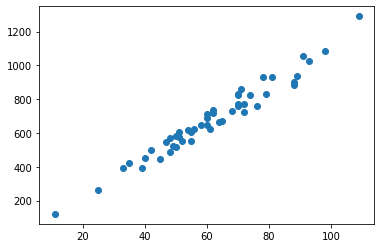

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["Quadratmeter"], df["Kaltmiete"])
plt.show()

Wir teilen unsere Daten auf in **Trainingsdaten** und **Testdaten**. Mit den Trainingsdaten erstellen wir unsere Modell. Mit den Testdaten schauen wir, wie gut es verallgemeinert.

In [4]:
from sklearn.model_selection import train_test_split
X = df[["Quadratmeter"]].values
Y = df[["Kaltmiete"]].values
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state = 0)

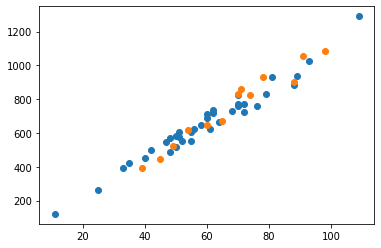

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test)

## Training des Datenmodels
Wir erstellen ein Modell und trainieren es mit den Testdaten.

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

print ("Achsenabschnitt b: " + str(model.intercept_))
print ("Steigung a: " + str(model.coef_))

Achsenabschnitt b: [18.42935284]
Steigung a: [[10.72967643]]


In [7]:
predicted = model.predict(X_test)
print(predicted)

[[ 436.88673371]
 [ 769.50670311]
 [ 855.34411457]
 [ 962.64087889]
 [ 994.82990819]
 [1069.93764321]
 [ 780.23637954]
 [ 501.2647923 ]
 [ 597.83188019]
 [ 544.18349803]
 [ 662.20993878]
 [ 812.42540884]
 [ 715.85832095]]


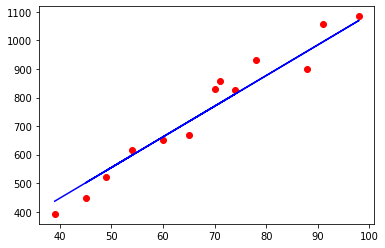

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_test, predicted, color = "blue")
plt.show()

In [9]:
model.score(X_test, Y_test)

0.9467403838586759